# MNIST + Softmax classification

In [ ]:
import torch
# Here we import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [ ]:
# if GPU available, use CUDA. Otherwise, use cpu.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device)

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)


cuda


In [ ]:
# parameters
training_epochs = 20
batch_size = 200

In [ ]:
# torchvision.datasets.dsets.MNIST를 사용: MNIST 데이터셋을 가져옴
# 첫번째 인자 root는 MNIST 데이터 받을 경로. 
# 두번째 인자 train=Ture MNIST의 훈련 데이터, False를 주면 테스트 데이터를 리턴. 
# 세번째 인자 transform은 현재 데이터를 파이토치 텐서로 변환. 
# 네번째 인자 해당 경로에 MNIST 데이터가 없다면 다운로드 받겠다.
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

print(mnist_train.train_data.view(-1, 28 * 28).float().shape)
print(mnist_test.test_data.view(-1, 28 * 28).float().shape)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

torch.Size([60000, 784])
torch.Size([10000, 784])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [ ]:
# dataset loader
# 첫번째 인자인 dataset은 로드할 대상을 의미
# 두번째 인자인 batch_size는 배치 크기
# shuffle은 매 에포크마다 미니 배치를 셔플할 것인지의 여부
# drop_last는 마지막 배치를 버릴 것인지를 의미.
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)



In [ ]:
# MNIST data image of shape 28 * 28 = 784, input_dim은 784이고, output_dim은 10

# to() 함수는 연산을 어디서 수행할지를 정합니다. to() 함수는 모델의 매개변수를 지정한 장치의 메모리로 보냄.
# CPU를 사용할 경우에는 필요가 없지만, GPU를 사용하려면 to('cuda')를 해야함.
# 아무것도 지정하지 않은 경우에는 CPU 연산.

linear = torch.nn.Linear(784, 10, bias=True).to(device)


In [ ]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [ ]:
import time
t1 = time.time()
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')
t2 = time.time()
print("it takes ", t2-t1, "seconds witn my ", device)

Epoch: 0001 cost = 0.657341182
Epoch: 0002 cost = 0.407732546
Epoch: 0003 cost = 0.367717773
Epoch: 0004 cost = 0.347146481
Epoch: 0005 cost = 0.334175944
Epoch: 0006 cost = 0.324955016
Epoch: 0007 cost = 0.317623496
Epoch: 0008 cost = 0.312019020
Epoch: 0009 cost = 0.307140172
Epoch: 0010 cost = 0.303371340
Epoch: 0011 cost = 0.300028920
Epoch: 0012 cost = 0.296899021
Epoch: 0013 cost = 0.294366300
Epoch: 0014 cost = 0.292094886
Epoch: 0015 cost = 0.290036380
Epoch: 0016 cost = 0.288134336
Epoch: 0017 cost = 0.286406755
Epoch: 0018 cost = 0.284962922
Epoch: 0019 cost = 0.283423275
Epoch: 0020 cost = 0.282116771
Learning finished
it takes  110.56127786636353 seconds witn my  cuda


X_test size torch.Size([10000, 784])
Y_test size torch.Size([10000])
Accuracy: 0.8908999562263489
Label:  7
Prediction:  7


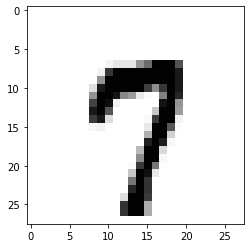

In [ ]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    print("X_test size", X_test.shape)
    print("Y_test size", Y_test.shape)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

In [ ]:
!nvidia-smi

Wed Nov 16 09:58:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0    33W /  70W |    886MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------